<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_1_0_9_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.559665,65.506796,62.204893,-0.225772,221.045582,221.125480,-0.079898
1,0.0,1.0,85.806527,39.414469,66.290004,-0.178698,201.332302,201.614749,-0.282446
2,0.0,2.0,88.843993,45.470831,60.892483,-0.168521,205.038786,205.245343,-0.206557
3,0.0,3.0,75.172726,54.635387,24.493090,0.201681,164.502884,164.239142,0.263741
4,0.0,4.0,72.742179,76.716244,77.068655,-0.110879,236.416199,236.298896,0.117304
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,56.606926,53.239873,98.797617,1.055957,219.700374,218.805024,0.895350
59996,999.0,56.0,51.729867,58.780604,86.269095,1.314496,208.094061,206.917148,1.176914
59997,999.0,57.0,27.813344,33.913714,22.326228,-0.532340,93.520946,93.854432,-0.333486
59998,999.0,58.0,93.263711,52.411234,41.864984,-0.631754,196.908175,197.217210,-0.309036


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.559665  65.506796  62.204893  ...  221.045582  221.125480 -0.079898
      1.0    85.806527  39.414469  66.290004  ...  201.332302  201.614749 -0.282446
      2.0    88.843993  45.470831  60.892483  ...  205.038786  205.245343 -0.206557
      3.0    75.172726  54.635387  24.493090  ...  164.502884  164.239142  0.263741
      4.0    72.742179  76.716244  77.068655  ...  236.416199  236.298896  0.117304
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   56.606926  53.239873  98.797617  ...  219.700374  218.805024  0.895350
      56.0   51.729867  58.780604  86.269095  ...  208.094061  206.917148  1.176914
      57.0   27.813344  33.913714  22.326228  ...   93.520946   93.854432 -0.333486
      58.0   93.263711  52.411234  41.864984  ...  196.908175  197.217210 -0.309036
      59.0   28.320941  90.209965  55.966704  ...  184.952799  184.706283  0.246516

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.559665  65.506796  62.204893  ...  221.045582  221.125480 -0.079898
      1.0    85.806527  39.414469  66.290004  ...  201.332302  201.614749 -0.282446
      2.0    88.843993  45.470831  60.892483  ...  205.038786  205.245343 -0.206557
      3.0    75.172726  54.635387  24.493090  ...  164.502884  164.239142  0.263741
      4.0    72.742179  76.716244  77.068655  ...  236.416199  236.298896  0.117304
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   56.606926  53.239873  98.797617  ...  219.700374  218.805024  0.895350
      56.0   51.729867  58.780604  86.269095  ...  208.094061  206.917148  1.176914
      57.0   27.813344  33.913714  22.326228  ...   93.520946   93.854432 -0.333486
      58.0   93.263711  52.411234  41.864984  ...  196.908175  197.217210 -0.309036
      59.0   28.320941  90.209965  55.966704  ...  184.952799  184.706283  0.246516

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.559665,65.506796,62.204893,-0.225772,221.045582,221.125480,-0.079898
1,0.0,1.0,85.806527,39.414469,66.290004,-0.178698,201.332302,201.614749,-0.282446
2,0.0,2.0,88.843993,45.470831,60.892483,-0.168521,205.038786,205.245343,-0.206557
3,0.0,3.0,75.172726,54.635387,24.493090,0.201681,164.502884,164.239142,0.263741
4,0.0,4.0,72.742179,76.716244,77.068655,-0.110879,236.416199,236.298896,0.117304
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,56.606926,53.239873,98.797617,1.055957,219.700374,218.805024,0.895350
59996,999.0,56.0,51.729867,58.780604,86.269095,1.314496,208.094061,206.917148,1.176914
59997,999.0,57.0,27.813344,33.913714,22.326228,-0.532340,93.520946,93.854432,-0.333486
59998,999.0,58.0,93.263711,52.411234,41.864984,-0.631754,196.908175,197.217210,-0.309036


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.559665  65.506796  62.204893  ...  221.045582  221.125480 -0.079898
      1.0    85.806527  39.414469  66.290004  ...  201.332302  201.614749 -0.282446
      2.0    88.843993  45.470831  60.892483  ...  205.038786  205.245343 -0.206557
      3.0    75.172726  54.635387  24.493090  ...  164.502884  164.239142  0.263741
      4.0    72.742179  76.716244  77.068655  ...  236.416199  236.298896  0.117304
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   56.606926  53.239873  98.797617  ...  219.700374  218.805024  0.895350
      56.0   51.729867  58.780604  86.269095  ...  208.094061  206.917148  1.176914
      57.0   27.813344  33.913714  22.326228  ...   93.520946   93.854432 -0.333486
      58.0   93.263711  52.411234  41.864984  ...  196.908175  197.217210 -0.309036
      59.0   28.320941  90.209965  55.966704  ...  184.952799  184.706283  0.246516

[60000 rows x 7 columns]

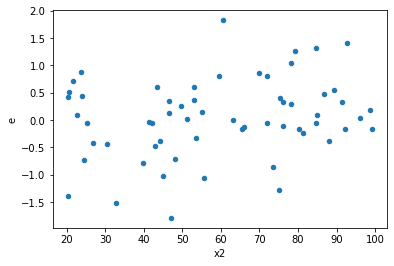

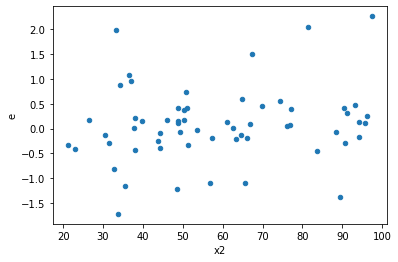

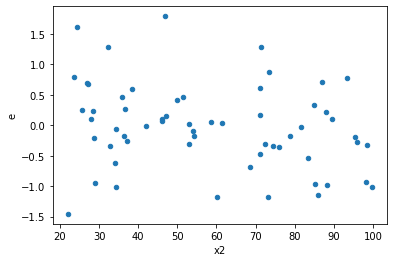

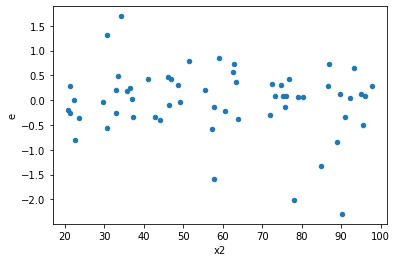

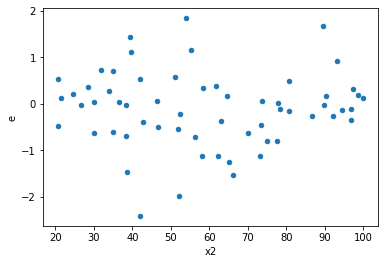

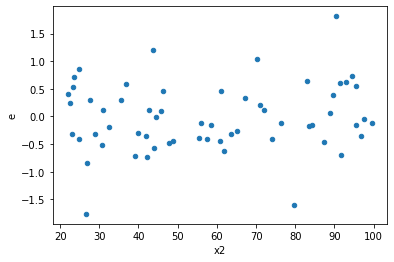

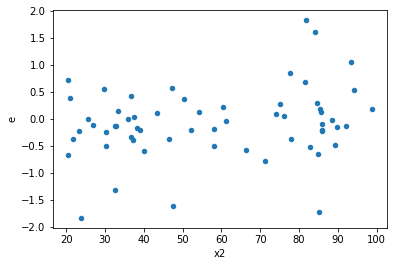

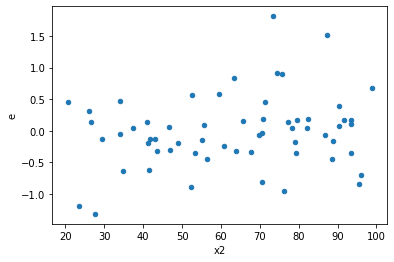

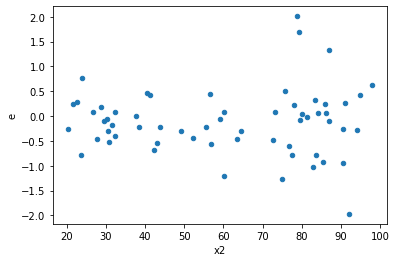

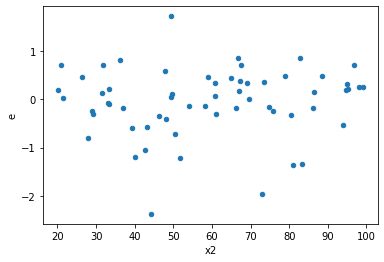

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,31.0,23.0,8.777628700623357,16.61317598176339,0.29258762335411187,0.7551443628074268,2.5509932966098288,0.015715905250462736,0.9921420473747686,Reject005=0 : Heteroscedasticity
6.0,26.0,28.0,7.863863390883409,9.41329664554291,0.31455453563533636,0.3486406165015893,1.1115297760451663,0.7894889251816075,0.6052555374091962,Reject005=1 : Homoscedasticity
7.0,30.0,24.0,17.046074417185928,15.553431291981937,0.5877956695581354,0.6762361431296494,1.1405434846263562,0.7251998407634188,0.6374000796182906,Reject005=1 : Homoscedasticity
9.0,20.0,34.0,3.8361943270994625,31.372168271074273,0.20190496458418225,0.9506717657901295,4.810553130658759,0.00047824213284242134,0.9997608789335788,Reject005=0 : Heteroscedasticity
10.0,27.0,27.0,14.064891454820895,14.101932858812843,0.5409573636469575,0.5423820330312632,1.0026336075262956,0.9945980813293971,0.5027009593353015,Reject005=1 : Homoscedasticity
13.0,25.0,29.0,9.791224489648885,13.608798646681478,0.4079676870687035,0.4860285230957671,1.198187518188324,0.650388668188175,0.6748056659059125,Reject005=1 : Homoscedasticity
14.0,28.0,26.0,11.951905215830104,24.931060347098658,0.4426631561418557,0.9972424138839463,2.246406220189193,0.03850328076121823,0.9807483596193909,Reject005=0 : Heteroscedasticity
15.0,27.0,27.0,6.305442644829346,12.61107272144253,0.2425170248011287,0.4850412585170204,2.0000297253966766,0.07721754755874688,0.9613912262206266,Reject005=1 : Homoscedasticity
16.0,27.0,27.0,9.21105485823187,13.843247129915301,0.3542713407012258,0.5324325819198192,1.5028948739289796,0.2959643487207084,0.8520178256396458,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,23.0,8.777628700623357,16.61317598176339,0.29258762335411187,0.7551443628074268,2.5509932966098288,0.015715905250462736,Reject005=0 : Heteroscedasticity
1.0,28.0,26.0,17.206500508359873,14.714308591968152,0.6372777966059212,0.588572343678726,0.9209413893289373,0.8360572803569672,Reject005=1 : Homoscedasticity
2.0,20.0,34.0,8.820119527874926,11.75695915996845,0.46421681725657504,0.35627148969601363,0.7841002956407187,0.5190524917256439,Reject005=1 : Homoscedasticity
3.0,33.0,21.0,22.10480845995137,7.99427994088393,0.6907752643734804,0.39971399704419647,0.5683125429412093,0.1765303956573939,Reject005=1 : Homoscedasticity
4.0,38.0,16.0,20.110558318649602,4.421806855161468,0.543528603206746,0.2947871236774312,0.5222028704826962,0.16297260885587092,Reject005=1 : Homoscedasticity
5.0,31.0,23.0,25.45116496239979,8.41897239712314,0.8483721654133264,0.38268056350559726,0.4458464136699978,0.04854599260478274,Reject005=0 : Heteroscedasticity
6.0,26.0,28.0,7.863863390883409,9.41329664554291,0.31455453563533636,0.3486406165015893,1.1115297760451663,1.2105110748183925,Reject005=1 : Homoscedasticity
7.0,30.0,24.0,17.046074417185928,15.553431291981937,0.5877956695581354,0.6762361431296494,1.1405434846263562,1.2748001592365812,Reject005=1 : Homoscedasticity
8.0,21.0,33.0,14.927477395920695,20.01265455357222,0.7463738697960347,0.6253954547991318,0.8531465355613767,0.667138754191743,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      846
Reject005=0 : Heteroscedasticity    154
Name: Result_test, dtype: int64